### Time to get your hands dirty! The irreducible mass of black holes.

This is an example that comes straight out of [my research](https://arxiv.org/abs/2202.08848) in general relativity (and was first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurment of $M$ and $\chi$. This is just because we're still frequentists for now. When we put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. (At home...)  Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If yes please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy import integrate
from scipy import stats
import math
import matplotlib 
from tqdm import tqdm
#cmap = mpl.colormaps['viridis']

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=11

In [19]:
def massmu(std, N):
    return np.random.normal(1, std, N)

def mirr(mass, chi, N):
    return mass * ((1+(1-chi**2)**0.5)/2)**0.5

### Histogram & KDE

We start with a mass distribution with width 0.02.

In [544]:
sigma = 0.02
N = 10000

chi = np.random.uniform(0, 1, N)
M = massmu(sigma, N)

Mi = mirr(M, chi, N)

print(Mi.shape)

(10000,)


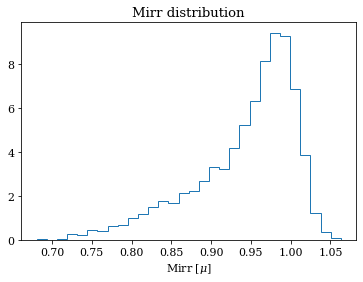

In [545]:
plt.hist(Mi, histtype='step', density=True, bins=30, label= 'Mirr')
plt.xlabel('Mirr [$\mu$]')
plt.title('Mirr distribution');

We now represent it through a kde

In [546]:
kde_mi = KernelDensity(bandwidth=0.01)
kde_mi.fit(Mi[:, np.newaxis]);

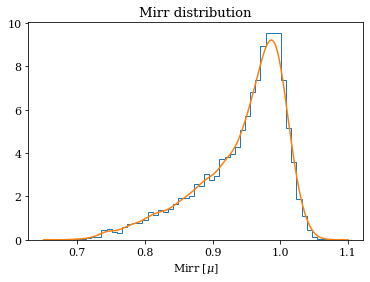

In [64]:
xgrid = np.linspace (0.65, 1.1,1000)

plt.hist(Mi, histtype='step', density=True, bins=50)
plt.plot(xgrid, np.exp(kde_mi.score_samples(xgrid.reshape(-1,1))))
plt.xlabel('Mirr [$\mu$]')
plt.title('Mirr distribution');

#### optimize bandwidth 

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'bandwidth':np.logspace(-3, -1, 20)}
kde_mi = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde_mi, parameters, cv=5, verbose=2, n_jobs = -1)
grid.fit(Mi[:, np.newaxis])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KernelDensity(), n_jobs=-1,
             param_grid={'bandwidth': array([0.001     , 0.00127427, 0.00162378, 0.00206914, 0.00263665,
       0.00335982, 0.00428133, 0.00545559, 0.00695193, 0.00885867,
       0.01128838, 0.0143845 , 0.01832981, 0.02335721, 0.02976351,
       0.0379269 , 0.0483293 , 0.06158482, 0.078476  , 0.1       ])},
             verbose=2)

best bw: 0.0069519279617756054


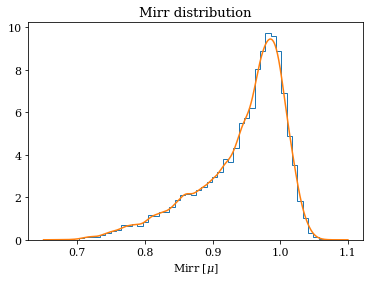

[CV] END ....................................bandwidth=0.001; total time=   0.6s
[CV] END ....................bandwidth=0.0012742749857031334; total time=   0.6s
[CV] END ....................bandwidth=0.0012742749857031334; total time=   0.6s
[CV] END .....................bandwidth=0.001623776739188721; total time=   0.6s
[CV] END ......................bandwidth=0.00206913808111479; total time=   0.7s
[CV] END ....................bandwidth=0.0026366508987303583; total time=   0.8s
[CV] END .....................bandwidth=0.003359818286283781; total time=   0.8s
[CV] END .....................bandwidth=0.003359818286283781; total time=   0.8s
[CV] END .....................bandwidth=0.004281332398719396; total time=   0.9s
[CV] END ......................bandwidth=0.00545559478116852; total time=   1.0s
[CV] END ....................bandwidth=0.0069519279617756054; total time=   1.1s
[CV] END ....................bandwidth=0.0069519279617756054; total time=   1.0s
[CV] END ...................

In [32]:
bw_best = grid.best_params_['bandwidth']
print('best bw:', bw_best)
kde_mi = KernelDensity(bandwidth=bw_best)
kde_mi.fit(Mi[:, np.newaxis])
xgrid = np.linspace(0.65, 1.1,1000)

plt.hist(Mi, histtype='step', density=True, bins=50)
plt.plot(xgrid, np.exp(kde_mi.score_samples(xgrid.reshape(-1,1))))
plt.xlabel('Mirr [$\mu$]')
plt.title('Mirr distribution');

### KS test

Compute KS distance between (Mirr,f) and (Mirr, M) at different $\sigma$

In [65]:
# choose different values of sigma
sigma = np.logspace(-5, 2, 30)


# create for each sigma an array with the distribution of mass, Mi, f
M = [massmu(sigma[i], N) for i in range(len(sigma))]
Mi = mirr(M, chi, N)
f = Mi/M


# for each sigma we compute the KS distance of the corresponding distribution and put the value in an array
KS_MiM = []
KS_Mif = []

for i in range(len(sigma)):
    KS_MiM.append(stats.ks_2samp(Mi[i], M[i]))
    KS_Mif.append(stats.ks_2samp(Mi[i], f[i]))

KS_MiM = np.array(KS_MiM)
KS_Mif = np.array(KS_Mif)

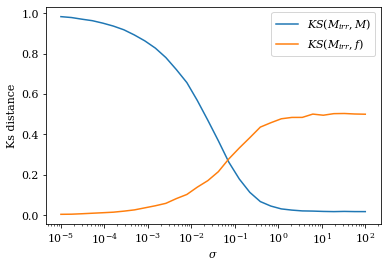

In [66]:
plt.plot(sigma , KS_MiM[:,0], label=r'$KS(M_{irr}, M)$')
plt.plot(sigma , KS_Mif[:,0], label=r'$KS(M_{irr}, f)$')
plt.legend()
plt.xlabel(r'$\sigma$')
plt.ylabel('Ks distance')
plt.semilogx();

For $\sigma \rightarrow 0$ Mirr and f have high probability of being drawn from the same distribution and then as $\sigma$ grows the two distributions get departed.
Instead it's the contrary for Mirr, M that have zero KS distance from $\sigma \sim 1$ on.


### Mirr distribution (math definition and KDE)

At first we plot Mirr by numerically solving the integral

In [346]:
Migrid = np.linspace(0,2, 1000)
s = np.linspace(0.02, 0.1, 5)

  0%|                                                     | 0/5 [00:00<?, ?it/s]/var/folders/l6/xx2lbds11l37fqdhf3bcglx80000gn/T/ipykernel_10084/2722707206.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda m:
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.09it/s]


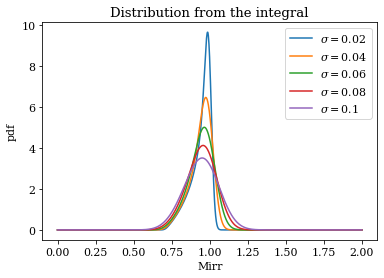

In [164]:
for i in tqdm(range(len(s))):
    pMi = np.array([
        integrate.quad(lambda m:
                                          1/(2*math.pi*s[i]**2)**0.5*math.exp(-0.5*((Migrid[a]/m-1)/s[i])**2)*(4*m**2-2)/(m*(1-m**2)**0.5),
                                          1/2**0.5, 1)[0] for a in range(0, len(Migrid))
    ]) 

    plt.plot(Migrid, pMi, label=r'$\sigma = $'+str(s[i]))
    plt.legend()
    plt.xlabel('Mirr')
    plt.ylabel('pdf')
    plt.title('Distribution from the integral')

##### compare with the KDE 

In [122]:
Migrid = np.linspace(0,2, 1000)
M = [massmu(s[i], N) for i in range(len(s))]
Mi = mirr(M, chi, N)

print(np.array(M).shape, Mi.shape)

(5, 10000) (5, 10000)


In [150]:
# Calculate the best bw with gridsearch for every sigma

kde_mi = [None for i in range(len(s))]
clf = KernelDensity()
bw_range=[np.linspace(10**-2.5, 10**-1.5, 30),
          np.linspace(10**-2.5, 10**-1.5, 30),
          np.linspace(10**-2., 10**-1., 30),
          np.linspace(10**-2, 10**-1, 30),
          np.linspace(10**-2, 10**-1, 30)
         ]

for i in range(len(s)):
    parameters = {'bandwidth':bw_range[i]}
    grid = GridSearchCV(clf, parameters, cv=5, verbose=2, n_jobs = -1)
    grid.fit(Mi[i][:, np.newaxis])
    bw_best = grid.best_params_['bandwidth']
    print(bw_best)
    
    # Get the kde with the best bw
    kde_mi[i] = (KernelDensity(bandwidth=bw_best)) 
    kde_mi[i].fit(Mi[i][:,np.newaxis])

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................................bandwidth=0.001; total time=   1.4s
[CV] END ....................................bandwidth=0.001; total time=   0.7s
[CV] END ....................bandwidth=0.0014736842105263158; total time=   0.7s
[CV] END ....................bandwidth=0.0019473684210526317; total time=   0.7s
[CV] END ....................bandwidth=0.0024210526315789475; total time=   0.8s
[CV] END ....................bandwidth=0.0028947368421052633; total time=   0.8s
[CV] END ....................bandwidth=0.0028947368421052633; total time=   2.3s
[CV] END .....................bandwidth=0.003368421052631579; total time=   0.9s
[CV] END .....................bandwidth=0.003842105263157895; total time=   0.9s
[CV] END ......................bandwidth=0.00431578947368421; total time=   0.9s
[CV] END .....................bandwidth=0.004789473684210527; total time=   0.9s
[CV] END .....................bandwidth=0.00478

  0%|                                                     | 0/5 [00:00<?, ?it/s]/var/folders/l6/xx2lbds11l37fqdhf3bcglx80000gn/T/ipykernel_10084/138884707.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda m:
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.48it/s]


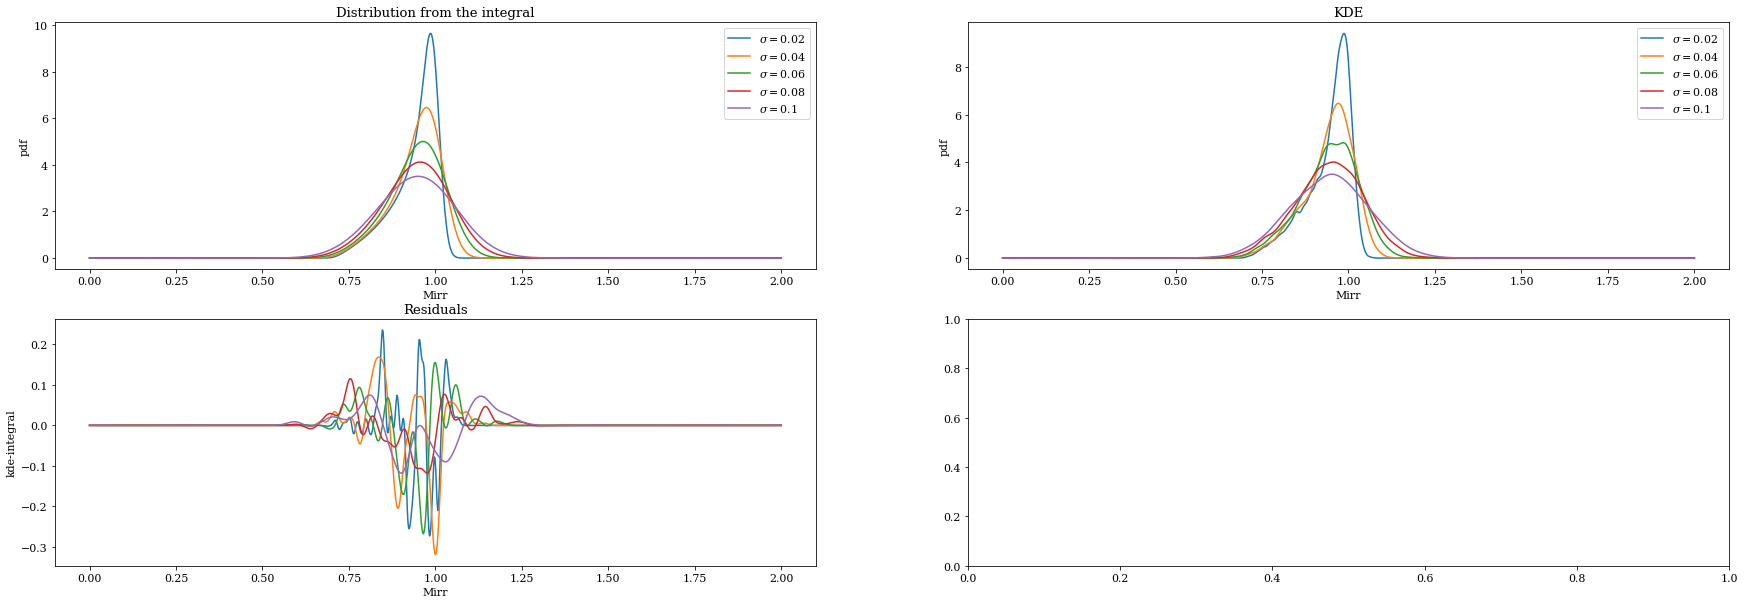

In [357]:
fig, ax = plt.subplots(2, 2, figsize = (30, 10))
axs = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]



for i in tqdm(range(len(s))):
    
 
    pMi = np.array([
        integrate.quad(lambda m:
                                          1/(2*math.pi*s[i]**2)**0.5*math.exp(-0.5*((Migrid[a]/m-1)/s[i])**2)*(4*m**2-2)/(m*(1-m**2)**0.5),
                                          1/2**0.5, 1)[0] for a in range(0, len(Migrid))
    ]) 

    ax[0,0].plot(Migrid, pMi, label=r'$\sigma = $'+str(s[i]))
    ax[0,0].legend()
    ax[0,0].set_xlabel('Mirr')
    ax[0,0].set_ylabel('pdf')
    ax[0,0].set_title('Distribution from the integral')
    
    
    
    Mi_kde = np.exp(kde_mi[i].score_samples(Migrid.reshape(-1,1)))
    
    ax[0,1].plot(Migrid, Mi_kde, label=r'$\sigma = $'+str(s[i]))
    ax[0,1].legend()
    ax[0,1].set_xlabel('Mirr')
    ax[0,1].set_ylabel('pdf')
    ax[0,1].set_title('KDE')
    
    res = Mi_kde-pMi
    ax[1,0].plot(Migrid, res, label=r'$\sigma = $'+str(s[i]))
    ax[1,0].set_title('Residuals')
    ax[1,0].set_xlabel('Mirr')
    ax[1,0].set_ylabel('kde-integral')

### CLT

Suppose I have a population of BH masses where the sigma is very low, let's say $\sigma=0.01$

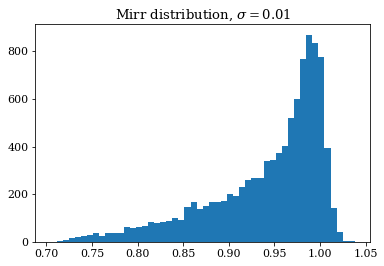

In [480]:
sigma =  0.01
chi = np.random.uniform(0, 1, 10000)
M = massmu(sigma, 10000)
Mi = mirr(M, chi, 10000)

meanMi = np.mean(Mi)
stdMi = np.std(Mi)
#plt.axvline(meanMi)

plt.hist(Mi, bins=50)
plt.title(r'Mirr distribution, $\sigma=0.01$');

I change the number of samples in the distribution, I do the mean and repeat the procedure 10000 times, saving the resulting means

#### size of distribution N = 2

In [493]:
Nmean = 10000     # size of population of means
N = 2             # Mirr distribution size
mean = []
sigma = 0.01

for i in range(Nmean):
    chi = np.random.uniform(0, 1, N)
    M = massmu(sigma, N)
    Mi = mirr(M, chi, N)
    
    # do the mean of the population
    mean.append(np.mean(Mi))

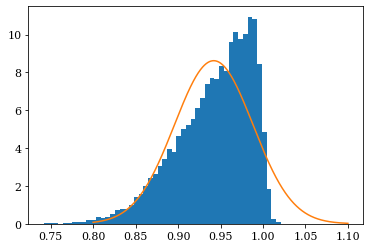

In [494]:
Gauss = stats.norm(meanMi, stdMi/N**0.5)
xgrid = np.linspace(0.8, 1.1, 1000)

np.array(mean).shape
plt.hist(mean, bins=50, density=True);
plt.plot(xgrid, Gauss.pdf(xgrid))  

#### N = 10

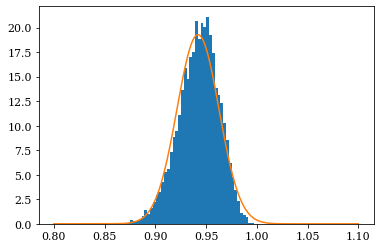

In [495]:
Nmean = 10000     # size of population of means
N = 10             # Mirr distribution size
mean = []
sigma = 0.01

for i in range(Nmean):
    chi = np.random.uniform(0, 1, N)
    M = massmu(sigma, N)
    Mi = mirr(M, chi, N)
    
    # do the mean of the population
    mean.append(np.mean(Mi))
    
    
Gauss = stats.norm(meanMi, stdMi/N**0.5)
xgrid = np.linspace(0.8, 1.1, 1000)

np.array(mean).shape
plt.hist(mean, bins=50, density=True);
plt.plot(xgrid, Gauss.pdf(xgrid))  

#### A sample of 200 irreducible masses

Now I consider 200 distribution of Mirr, each one originated different $\sigma/\mu$.
I take for each distribution the mean as a Mirr measure and the std as the uncertainty.
I change the size of the each mass distribution (i.e. of the amount of samples that I average to calculate my Mirr measurement).

##### N=10 (samples in a single mass distribution)

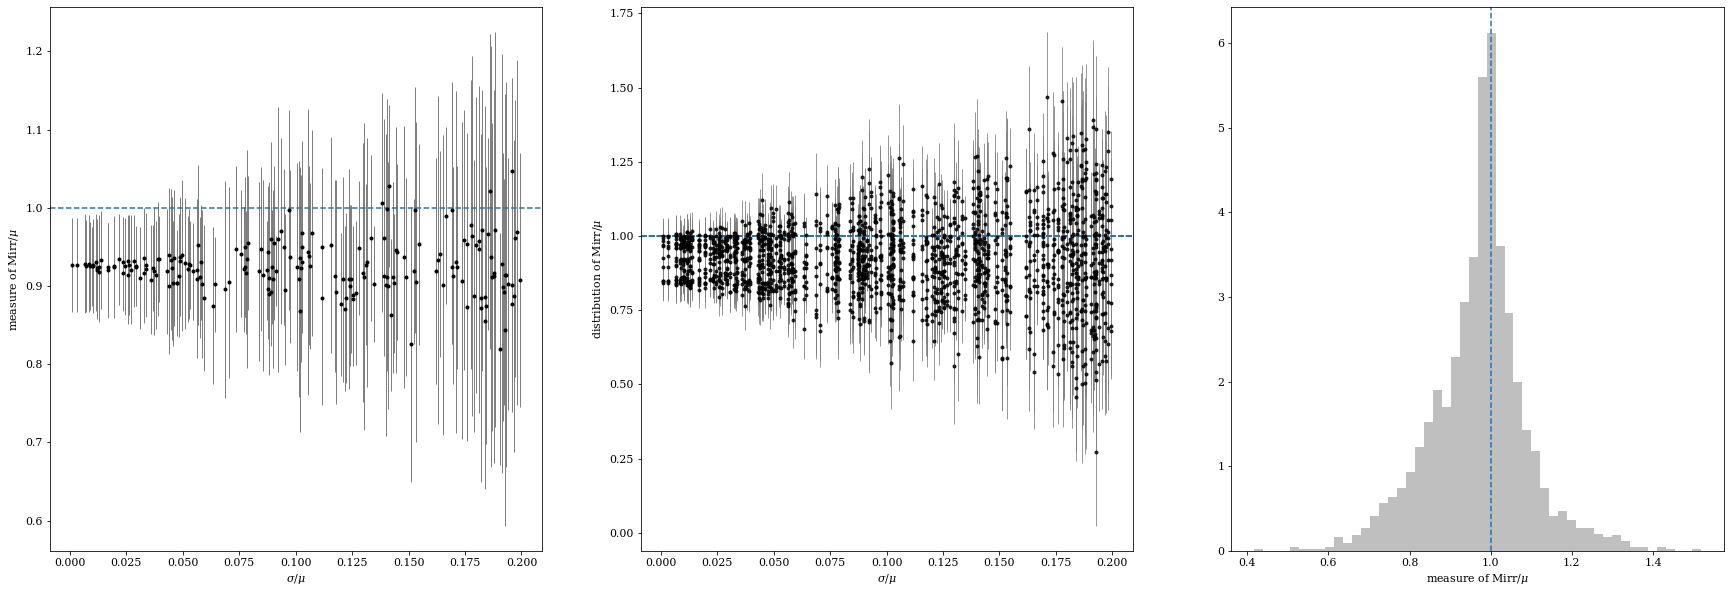

In [542]:
N = 10

sigma = np.random.uniform(0., 0.2, 200)
chi = np.random.uniform(0, 1, N)
M = [massmu(sigma[i], N) for i in range(len(sigma))]
Mi = mirr(M, chi, N)
sigma_mi = np.std(Mi, axis=1)
sampleMi = np.mean(Mi, axis=1)


fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131)
plt.errorbar(sigma, sampleMi, sigma_mi, fmt='.k', ecolor='gray', lw=1,label='data')
plt.axhline(1, 0., 1., linestyle='--')
plt.xlabel('$\sigma/\mu$ ')
plt.ylabel(r'measure of Mirr/$\mu$')

ax2 = fig.add_subplot(132)
for i in range(0, N):
    plt.errorbar(sigma, Mi[:,i], sigma_mi, fmt='.k', ecolor='gray', alpha=0.8, lw=1,label='data')
    plt.axhline(1, 0., 1., linestyle='--')
    plt.xlabel('$\sigma/\mu$')
    plt.ylabel(r'distribution of Mirr/$\mu$')
    
ax3 = fig.add_subplot(133)
plt.hist(Mi1.flatten(), density=True, color='gray', alpha=0.5, bins=50)
plt.axvline(1. ,0,5, linestyle='--')
plt.xlabel(r'measure of Mirr/$\mu$');

##### N=100 (samples in a single mass distribution)

In [538]:
N = 100

sigma = np.random.uniform(0., 0.2, 200)
chi = np.random.uniform(0, 1, N)
M = [massmu(sigma[i], N) for i in range(len(sigma))]
Mi = mirr(M, chi, N)
sigma_mi = np.std(Mi, axis=1)
sampleMi = np.mean(Mi, axis=1)

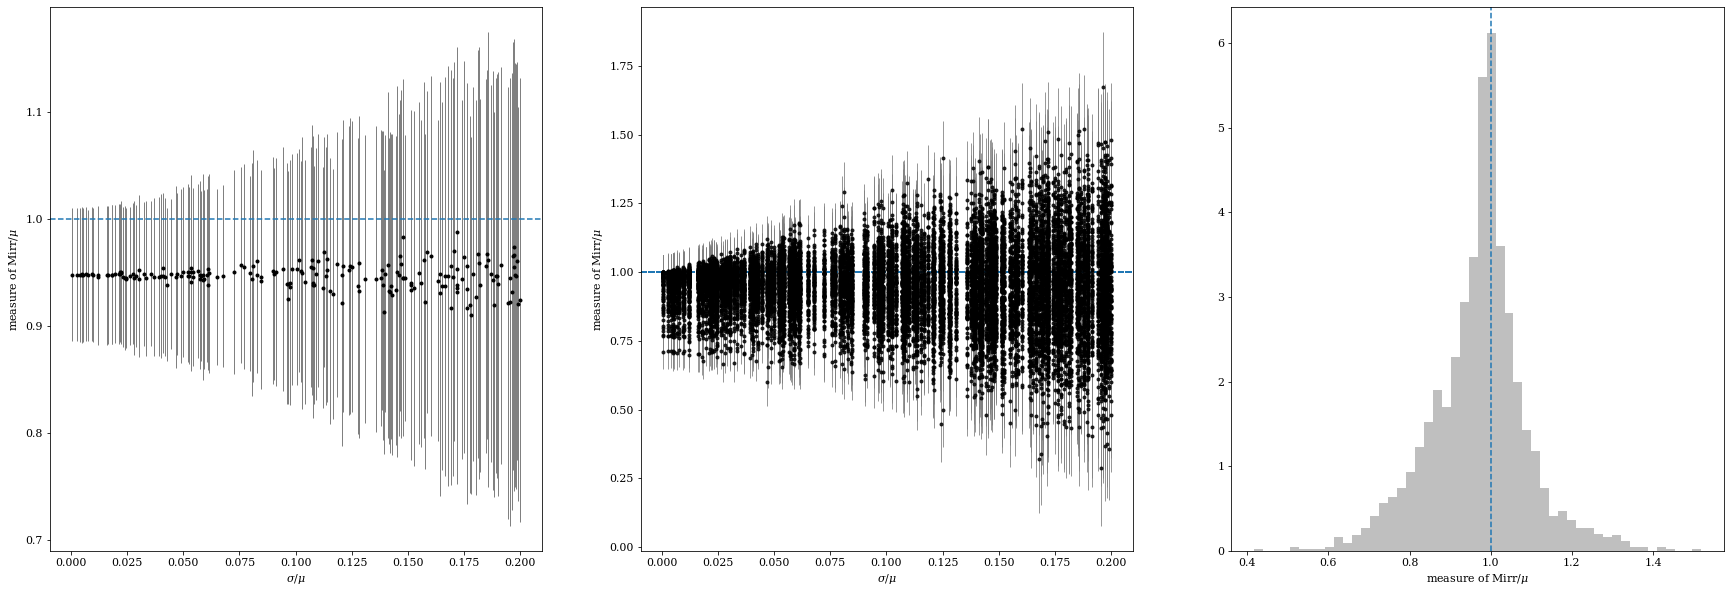

In [540]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131)
plt.errorbar(sigma, sampleMi, sigma_mi, fmt='.k', ecolor='gray', lw=1,label='data')
plt.axhline(1, 0., 1., linestyle='--')
plt.xlabel('$\sigma/\mu$ ')
plt.ylabel(r'measure of Mirr/$\mu$')

ax2 = fig.add_subplot(132)
for i in range(0, N):
    plt.errorbar(sigma, Mi[:,i], sigma_mi, fmt='.k', ecolor='gray', alpha=0.8, lw=1,label='data')
    plt.axhline(1, 0., 1., linestyle='--')
    plt.xlabel('$\sigma/\mu$')
    plt.ylabel(r'measure of Mirr/$\mu$')
    
ax3 = fig.add_subplot(133)
plt.hist(Mi1.flatten(), density=True, color='gray', alpha=0.5, bins=50)
plt.axvline(1. ,0,5, linestyle='--')
plt.xlabel(r'measure of Mirr/$\mu$');

##### N=10000 (samples in a single mass distribution)

In [307]:
N = 10000

chi = np.random.uniform(0, 1, N)
M = [massmu(sigma[i], N) for i in range(len(sigma))]
Mi3 = mirr(M, chi, N)
sigma_mi3 = np.array([
    (np.percentile(Mi3[i], 84.135) - np.percentile(Mi3[i], 15.865))*0.5 for i in range(0, len(Mi3)) ]) 
sampleMi = np.median(Mi3, axis=1)

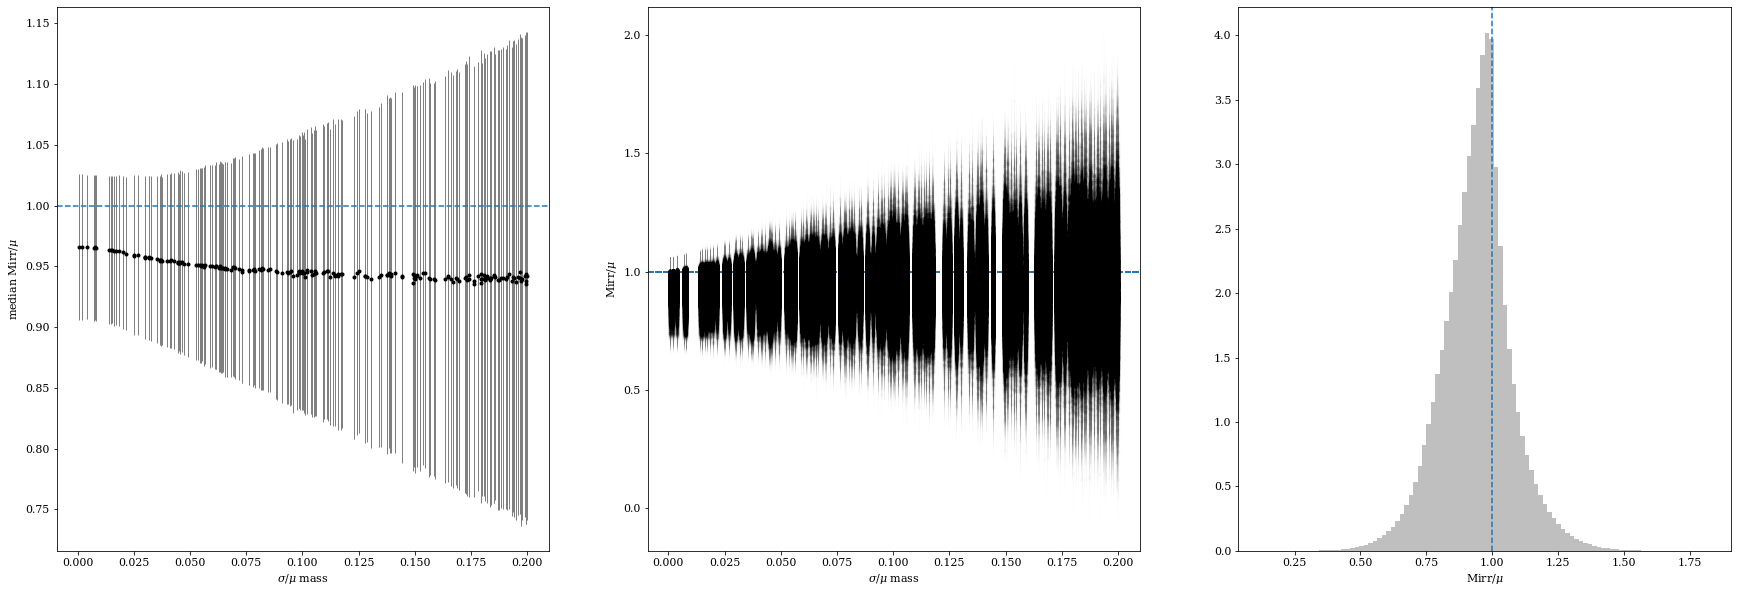

In [285]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131)
plt.errorbar(sigma, sampleMi, sigma_mi3, fmt='.k', ecolor='gray', lw=1,label='data')
plt.axhline(1, 0., 1., linestyle='--')
plt.xlabel('$\sigma/\mu$ mass')
plt.ylabel(r'median Mirr/$\mu$')

ax2 = fig.add_subplot(132)
for i in range(0, N):
    plt.errorbar(sigma, Mi3[:,i], sigma_mi3, fmt='.k', ecolor='gray', alpha=0.01, lw=1,label='data')
    plt.axhline(1, 0., 1., linestyle='--')
    plt.xlabel('$\sigma/\mu$ mass')
    plt.ylabel(r'Mirr/$\mu$')
    
ax3 = fig.add_subplot(133)
plt.hist(Mi3.flatten(), density=True, color='gray', alpha=0.5, bins=100)
plt.axvline(1. ,0,5, linestyle='--')
plt.xlabel(r'Mirr/$\mu$');